In [2]:
NetID = "jhu41"

# Part A: Parsing

In [3]:
# read in pf.log
with open('pf.log' ) as f:
    lines = f.readlines()

# strip all lines of whitespace
lines= [l.strip() for l in lines]
print(lines[1])


</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10+0xa7b5f/0xff3f00>


In [4]:
lines

['1506816069251:firefox:13179:0x282235aae:R:minor:50',
 '</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10+0xa7b5f/0xff3f00>',
 '</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1+0xa12a4/0xff8e00>',
 '</lib/x86_64-linux-gnu/libpthread-2.26.so+0x75fdc/0xff8800>',
 '</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0+0x1a966/0xff9100>',
 '</lib/x86_64-linux-gnu/libc-2.26.so+0x1d4d/0xffd900>',
 '1506816074664:firefox:13179:0x10fb420b4:W:minor:23',
 '</lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1+0xfc5e/0xfe2d00>',
 '</usr/lib/x86_64-linux-gnu/libxcb.so.1.1.0+0x944c1/0xffb100>',
 '</lib/x86_64-linux-gnu/libpthread-2.26.so+0x702dc/0xffba00>',
 '</lib/x86_64-linux-gnu/libc-2.26.so+0x80e98/0xff2e00>',
 '</usr/lib/x86_64-linux-gnu/libgdk-x11-2.0.so.0.2400.31+0x9e90/0xfeaa00>',
 '</usr/lib/x86_64-linux-gnu/libX11.so.6.3.0+0x5e0e5/0xfe3400>',
 '</usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10+0x27822/0xff4e00>',
 '1506816094793:thunderbird:5914:0x3e9e414bb:W:minor:11',
 '</usr/lib/x86_64-linux-gnu/libxcb.s

In [5]:
# parse each line into your data structure
# remember to convert addresses from strings to integers
mylistdata=[]
mylistbt1=[]
mylistbt=[]

    # write header line
A = ['index', 'time', 'proc_name', 'pid', 'pfaddr', 'rw', 'major_minor', 'resolve_time', 'lib', 'addr', 'offset']
   
count = -1
dup = 0
for n in lines:
        
    string=n
    if string[0] != "<":
        data=n.split(":")
        data[3]=int(data[3], 0)
        mylistdata.append(data)
        count+=1
        data.insert(0,count+1)
            
    else:
        libdata=n.split("+")
        addrdata=libdata[1].split("/")
        addrdata[0]=int(addrdata[0],0)
        newadata=addrdata[1]
        newadata=newadata[0:-1]
        newadata=int(newadata,0)
        newlibdata=libdata[0]
        newlibdata=newlibdata[1:]
        newn=[newlibdata,newadata,addrdata[0]]
        if dup == count:
            mylistbt1.append(newn)
        else:
            mylistbt.append(mylistbt1)
            mylistbt1 = []
            mylistbt1.append(newn)
            dup+=1

        

    


for i in range(len(mylistbt)):
    for j in range(len(mylistbt[i])):
        
        mylistbt[i][j].insert(0,mylistdata[i])


print(mylistbt[0:5])




[[[[1, '1506816069251', 'firefox', '13179', 10773289646, 'R', 'minor', '50'], '/usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10', 16727808, 686943], [[1, '1506816069251', 'firefox', '13179', 10773289646, 'R', 'minor', '50'], '/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', 16748032, 660132], [[1, '1506816069251', 'firefox', '13179', 10773289646, 'R', 'minor', '50'], '/lib/x86_64-linux-gnu/libpthread-2.26.so', 16746496, 483292], [[1, '1506816069251', 'firefox', '13179', 10773289646, 'R', 'minor', '50'], '/usr/lib/x86_64-linux-gnu/libX11.so.6.3.0', 16748800, 108902], [[1, '1506816069251', 'firefox', '13179', 10773289646, 'R', 'minor', '50'], '/lib/x86_64-linux-gnu/libc-2.26.so', 16767232, 7501]], [[[2, '1506816074664', 'firefox', '13179', 4558430388, 'W', 'minor', '23'], '/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1', 16657664, 64606], [[2, '1506816074664', 'firefox', '13179', 4558430388, 'W', 'minor', '23'], '/usr/lib/x86_64-linux-gnu/libxcb.so.1.1.0', 16756992, 607425], [[2, '15068160

In [6]:
'\t'.join(map(str, mylistbt[0][0][0][0:7]))

'1\t1506816069251\tfirefox\t13179\t10773289646\tR\tminor'

In [7]:
# write your data structure out to pf.csv
# include an index column with unique indices for each page fault

with open('pf.csv', 'w') as f:
    # write header line
    f.write('\t'.join(['index', 'time', 'proc_name', 'pid', 'pfaddr', 'rw', 'major_minor', 'resolve_time', 'lib', 'addr', 'offset']))
    f.write('\n')    
    # write each page fault & backtrace entry
    # hint: take a look at python's enumerate() function to generate indices
    # Remember that indices should be unique to each page fault
    for i in range(len(mylistbt)):
        for j in range(len(mylistbt[i])):
            f.write('\t'.join(map(str,[mylistbt[i][j][0][0],mylistbt[i][j][0][1],mylistbt[i][j][0][2],
                                       mylistbt[i][j][0][3],mylistbt[i][j][0][4],mylistbt[i][j][0][5],
                                       mylistbt[i][j][0][6],mylistbt[i][j][0][7],
                                       mylistbt[i][j][1],mylistbt[i][j][2],mylistbt[i][j][3]])))
            f.write('\n')




# Part B: Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [9]:
# relevant options when reading in pf.csv: sep, parse_dates
df = pd.read_csv('pf.csv', sep ='\t', parse_dates = ['time'])
# set the index of the data frame
df.set_index('index', inplace=True)

In [10]:
# have fun!
df.head(n=10)


,time,proc_name,pid,pfaddr,rw,major_minor,resolve_time,lib,addr,offset
index,,,,,,,,,,
1,1506816069251,firefox,13179,10773289646,R,minor,50,/usr/lib/x86_64-linux-gnu/libcairo.so.2.11400.10,16727808,686943
1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1,16748032,660132
1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libpthread-2.26.so,16746496,483292
1,1506816069251,firefox,13179,10773289646,R,minor,50,/usr/lib/x86_64-linux-gnu/libX11.so.6.3.0,16748800,108902
1,1506816069251,firefox,13179,10773289646,R,minor,50,/lib/x86_64-linux-gnu/libc-2.26.so,16767232,7501
2,1506816074664,firefox,13179,4558430388,W,minor,23,/lib/x86_64-linux-gnu/libglib-2.0.so.0.5400.1,16657664,64606
2,1506816074664,firefox,13179,4558430388,W,minor,23,/usr/lib/x86_64-linux-gnu/libxcb.so.1.1.0,16756992,607425
2,1506816074664,firefox,13179,4558430388,W,minor,23,/lib/x86_64-linux-gnu/libpthread-2.26.so,16759296,459484
2,1506816074664,firefox,13179,4558430388,W,minor,23,/lib/x86_64-linux-gnu/libc-2.26.so,16723456,528024


In [11]:

time_range=pd.to_datetime(df.time.max(),unit='ms')-pd.to_datetime(df.time.min(),unit='ms')
print(time_range)

98 days 18:56:36.739000


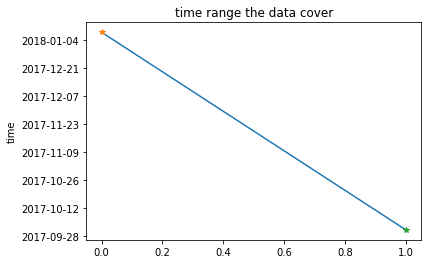

In [12]:
plt.plot([pd.to_datetime(df.time.max(),unit='ms'),pd.to_datetime(df.time.min(),unit='ms')])

plt.plot(pd.to_datetime(df.time.max(),unit='ms'),'*')
plt.plot(1,pd.to_datetime(df.time.min(),unit='ms'),'*')
plt.ylabel('time')
plt.title('time range the data cover')
plt.show()


In [13]:
newdf=~df.index.duplicated()
unique = df[newdf]
unique.groupby('proc_name').size()

proc_name
auditd           57185
bash             57427
firefox          58289
gitlab-runner    54543
google-chrome    59596
htop             58304
sshd             61721
subl             61745
thunderbird      59393
tmux             54661
watchdog         58839
xorg             61072
dtype: int64

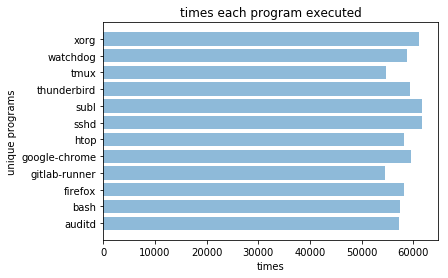

In [14]:
objects = ('auditd', 'bash', 'firefox', 'gitlab-runner', 'google-chrome', 'htop','sshd','subl','thunderbird','tmux'
          ,'watchdog','xorg')
y_pos = np.arange(len(objects))
performance = [57185,57427,58289,54543,59596,58304,61721,61745,59393,54661,58839,61072]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('unique programs')
plt.xlabel('times')
plt.title('times each program executed')

plt.show()

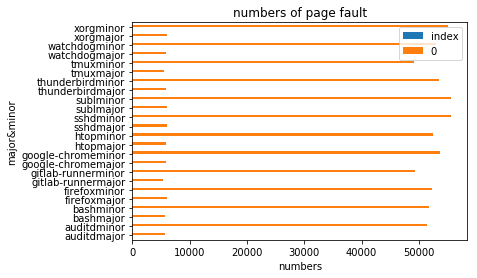

In [56]:
size=unique.groupby(['proc_name','major_minor']).size()
proc= pd.DataFrame(size.reset_index())
proc= proc.sort_values(['proc_name','major_minor']).reset_index()
proc.plot(kind='barh')
objects = ('auditdmajor','auditdminor', 'bashmajor', 'bashminor','firefoxmajor','firefoxminor' ,'gitlab-runnermajor',
           'gitlab-runnerminor','google-chromemajor','google-chromeminor' ,'htopmajor','htopminor','sshdmajor','sshdminor',
           'sublmajor','sublminor','thunderbirdmajor','thunderbirdminor','tmuxmajor','tmuxminor','watchdogmajor',
           'watchdogminor','xorgmajor','xorgminor')
y_pos = np.arange(len(objects))
plt.yticks(y_pos, objects)
plt.ylabel('major&minor')
plt.xlabel('numbers')
plt.title('numbers of page fault')


plt.show()

45.463048
65.548658
firefox
thunderbird
watchdog
auditd
subl
gitlab-runner
sshd
google-chrome
bash
tmux
xorg
htop


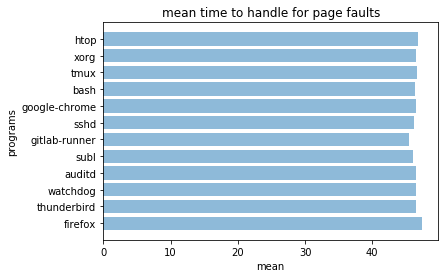

In [80]:
proc=unique[['proc_name','resolve_time']]
proc_name=proc.proc_name.unique()
mean=[]
std_deviation=[]
size=len(proc_name)
for i in proc_name:
    mean.append(proc[proc.proc_name == i].mean())
    std_deviation.append(proc[proc.proc_name == i].std())
print(float(str(mean[5])[16:25]))
print(float(str(std_deviation[5])[13:25]))

for i in range(0,size):
    print(str(proc_name[i]))
    
objects = ('firefox', 'thunderbird', 'watchdog', 'auditd', 'subl', 'gitlab-runner','sshd','google-chrome','bash','tmux'
          ,'xorg','htop')
y_pos = np.arange(len(objects))
performance = [float(str(mean[0])[16:25]),
              float(str(mean[1])[16:25]),
              float(str(mean[2])[16:25]),
              float(str(mean[3])[16:25]),
              float(str(mean[4])[16:25]),
              float(str(mean[5])[16:25]),
              float(str(mean[6])[16:25]),
              float(str(mean[7])[16:23]),
              float(str(mean[8])[16:25]),
              float(str(mean[9])[16:25]),
              float(str(mean[10])[16:25]),
              float(str(mean[11])[16:25]),]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('programs')
plt.xlabel('mean')
plt.title('mean time to handle for page faults')

plt.show()

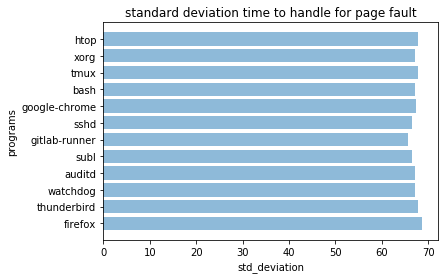

In [81]:
objects = ('firefox', 'thunderbird', 'watchdog', 'auditd', 'subl', 'gitlab-runner','sshd','google-chrome','bash','tmux'
          ,'xorg','htop')
y_pos = np.arange(len(objects))
performance = [float(str(std_deviation[0])[16:25]),
              float(str(std_deviation[1])[16:25]),
              float(str(std_deviation[2])[16:25]),
              float(str(std_deviation[3])[16:25]),
              float(str(std_deviation[4])[16:25]),
              float(str(std_deviation[5])[16:25]),
              float(str(std_deviation[6])[16:25]),
              float(str(std_deviation[7])[16:23]),
              float(str(std_deviation[8])[16:25]),
              float(str(std_deviation[9])[16:25]),
              float(str(std_deviation[10])[16:25]),
              float(str(std_deviation[11])[16:25]),]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('programs')
plt.xlabel('std_deviation')
plt.title('standard deviation time to handle for page fault')

plt.show()

In [109]:
libaa=pd.DataFrame(df.groupby(['lib','offset']).size().reset_index())
counter=0
liblist=[libaa.lib[0]]
offsetcount=[]
for i in range(1,560):
    if(str(libaa.lib[i])==str(libaa.lib[i-1])):
        counter+=1
        offsetcount.append(libaa.offset[i])

    else:
        liblist.append(libaa.lib[i])
        if(offsetcount[0]==7501):
            offsetcount.insert(0,2661)
        print(offsetcount)
        offsetcount=[]
        counter=0
    
print(offsetcount)
print(liblist)

[2661, 7501, 26957, 58413, 64480, 92026, 118769, 122525, 123523, 128049, 144359, 154183, 166874, 182207, 186026, 192403, 200798, 202115, 221467, 242568, 246987, 266218, 288096, 344835, 345705, 359186, 361316, 373303, 373420, 382950, 406666, 407362, 413022, 432026, 451489, 463886, 495649, 512912, 515698, 524605, 527875, 528024, 549484, 575524, 585730, 588524, 595939, 599260, 600600, 610928, 617071, 627692, 631368, 642527, 650129, 650996, 657111, 658698, 658789, 667230, 676136, 684008, 685122, 698331, 701712, 702722, 712124, 728828, 737098, 745897, 756697, 774289, 785911, 794958, 800535, 803745, 827040, 835413, 846872, 850304]
[25499, 36557, 37287, 50767, 64606, 77449, 80877, 99481, 107018, 111520, 135711, 160875, 176702, 187748, 188104, 199050, 225095, 250700, 265608, 285464, 293247, 297446, 306052, 326100, 349232, 353675, 361715, 369968, 370491, 371275, 378844, 380513, 381200, 387665, 390746, 415039, 415110, 417832, 420436, 425965, 432061, 439214, 460737, 470765, 477326, 538656, 543827

In [99]:
print(libaa)

                                           lib  offset     0
0           /lib/x86_64-linux-gnu/libc-2.26.so    2661  4961
1           /lib/x86_64-linux-gnu/libc-2.26.so    7501  4944
2           /lib/x86_64-linux-gnu/libc-2.26.so   26957  4944
3           /lib/x86_64-linux-gnu/libc-2.26.so   58413  5006
4           /lib/x86_64-linux-gnu/libc-2.26.so   64480  4903
5           /lib/x86_64-linux-gnu/libc-2.26.so   92026  4959
6           /lib/x86_64-linux-gnu/libc-2.26.so  118769  4949
7           /lib/x86_64-linux-gnu/libc-2.26.so  122525  5097
8           /lib/x86_64-linux-gnu/libc-2.26.so  123523  5042
9           /lib/x86_64-linux-gnu/libc-2.26.so  128049  5068
10          /lib/x86_64-linux-gnu/libc-2.26.so  144359  4934
11          /lib/x86_64-linux-gnu/libc-2.26.so  154183  5023
12          /lib/x86_64-linux-gnu/libc-2.26.so  166874  4951
13          /lib/x86_64-linux-gnu/libc-2.26.so  182207  5076
14          /lib/x86_64-linux-gnu/libc-2.26.so  186026  5022
15          /lib/x86_64-